### Image classifier for SVHN dataset

SVHN is an image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. 


In [43]:
# Load the libraries
# Tensorflow
import tensorflow as tf

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the datasets
from scipy.io import loadmat

# Utilities
import numpy as np
import pandas as pd
import random

In [2]:
# Load the datasets
train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

In [3]:
# Split the train and test datasets into data and labels
train_data, train_labels = train['X'], train['y']
test_data, test_labels = test['X'], test['y']
print('Train data shape   - ',train_data.shape)
print('Train labels shape - ',train_labels.shape)
print('Test data shape    - ',test_data.shape)
print('Test labels shape  - ',test_labels.shape)

Train data shape   -  (32, 32, 3, 73257)
Train labels shape -  (73257, 1)
Test data shape    -  (32, 32, 3, 26032)
Test labels shape  -  (26032, 1)


In [4]:
# Check the count by labels - train dataset
y_train_count = np.bincount(train_labels.ravel())
y_train_labels = np.nonzero(y_train_count)[0]
y_train_freq = np.vstack((y_train_labels, y_train_count[y_train_labels])).T
print(y_train_freq)

[[    1 13861]
 [    2 10585]
 [    3  8497]
 [    4  7458]
 [    5  6882]
 [    6  5727]
 [    7  5595]
 [    8  5045]
 [    9  4659]
 [   10  4948]]


In [5]:
# Check the count by labels - test dataset
y_test_count = np.bincount(test_labels.ravel())
y_test_labels = np.nonzero(y_test_count)[0]
y_test_freq = np.vstack((y_test_labels, y_test_count[y_test_labels])).T
print(y_test_freq)

[[   1 5099]
 [   2 4149]
 [   3 2882]
 [   4 2523]
 [   5 2384]
 [   6 1977]
 [   7 2019]
 [   8 1660]
 [   9 1595]
 [  10 1744]]


In [6]:
# Transposing the images
print('Before transpose : ',train_data.shape)
train_data = np.transpose(train_data, (3,0,1,2))
print('After transpose : ',train_data.shape)
test_data = np.transpose(test_data, (3,0,1,2))

Before transpose :  (32, 32, 3, 73257)
After transpose :  (73257, 32, 32, 3)


[55934, 46845, 54608, 25445, 25230, 59660, 26998, 5449, 57617, 6832, 38106, 66682]


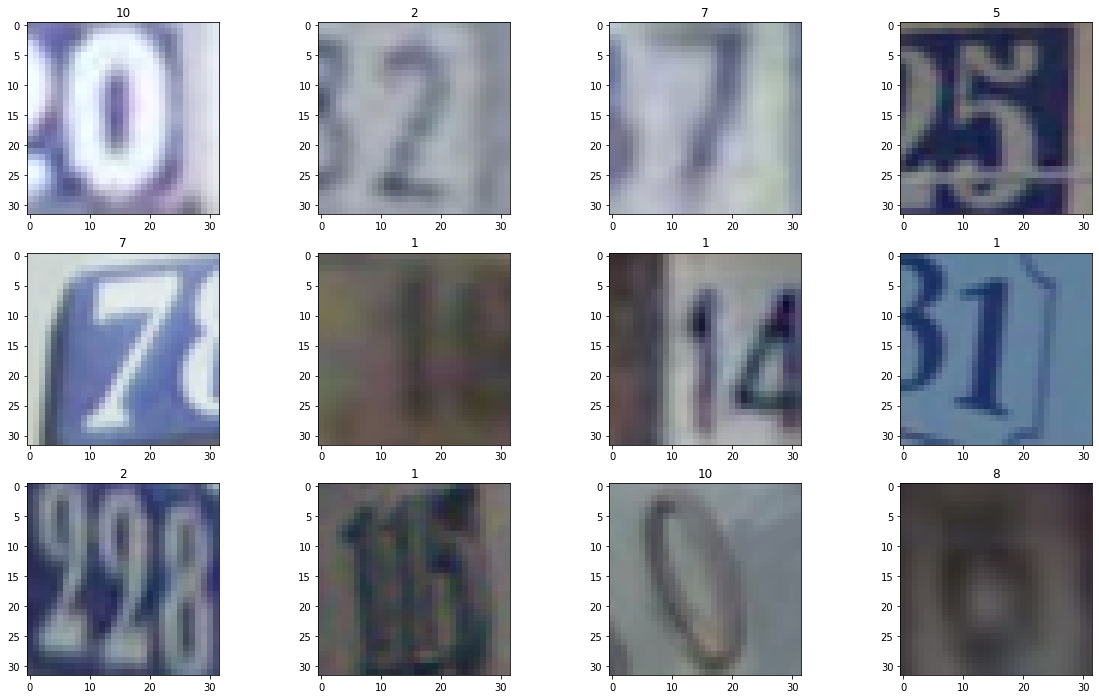

In [7]:
# Generating 12 random numbers to get random sample of images and corresponding labels
random_list = random.sample(range(0,train_data.shape[0]),12)
print(random_list)

fig = plt.figure(figsize=(20, 12))

i = 0
for ind in random_list:
    i = i + 1
    plt.subplot(3,4,i)
    plt.title(train_labels[ind][0])
    plt.imshow(train_data[ind,:,:,:])

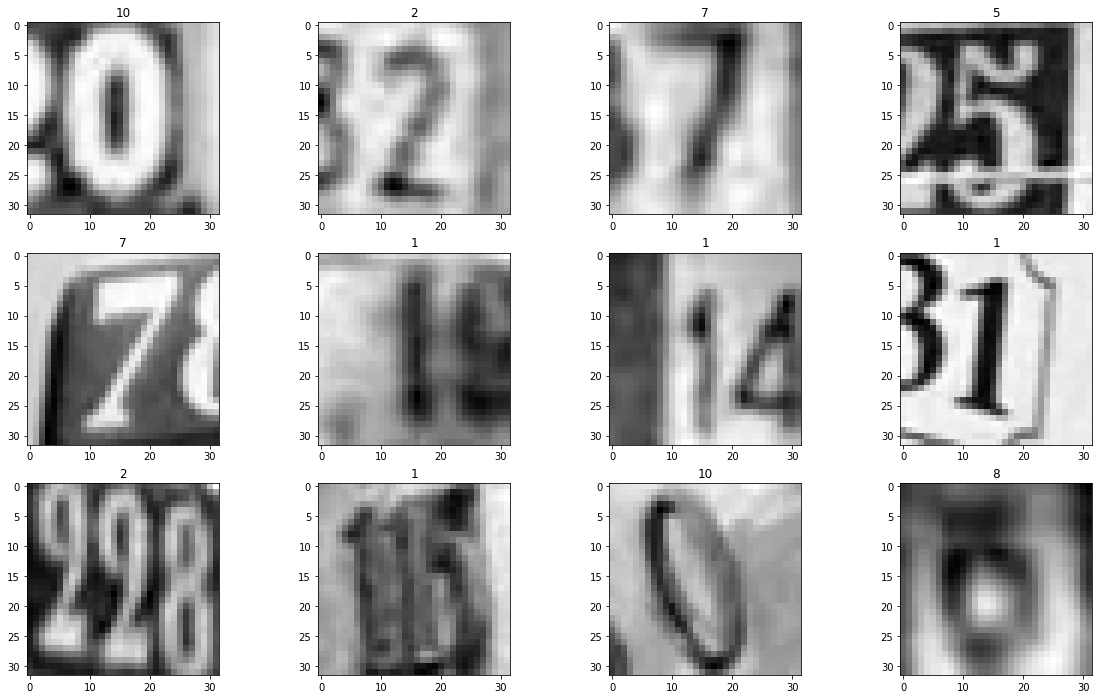

In [8]:
# Converting train and test images to gray scale and printing 12 samples in grey scale
train_data_gray = np.average(train_data, axis=3)
test_data_gray = np.average(test_data, axis=3)

fig = plt.figure(figsize=(20, 12))

i = 0
for ind in random_list:
    i = i + 1
    plt.subplot(3,4,i)
    plt.title(train_labels[ind][0])
    plt.imshow(train_data_gray[ind,:,:], cmap=plt.get_cmap("gray"))

In [9]:
train_data_gray.shape

(73257, 32, 32)

In [10]:
# Reshape train_data_gray and test_data_gray data sets
print(train_data_gray.shape)
train_data_use = train_data_gray.reshape(train_data_gray.shape[0],train_data_gray.shape[1],train_data_gray.shape[2],1)
print(train_data_use.shape)

print(test_data_gray.shape)
test_data_use = test_data_gray.reshape(test_data_gray.shape[0],test_data_gray.shape[1],test_data_gray.shape[2],1)
print(test_data_use.shape)

(73257, 32, 32)
(73257, 32, 32, 1)
(26032, 32, 32)
(26032, 32, 32, 1)


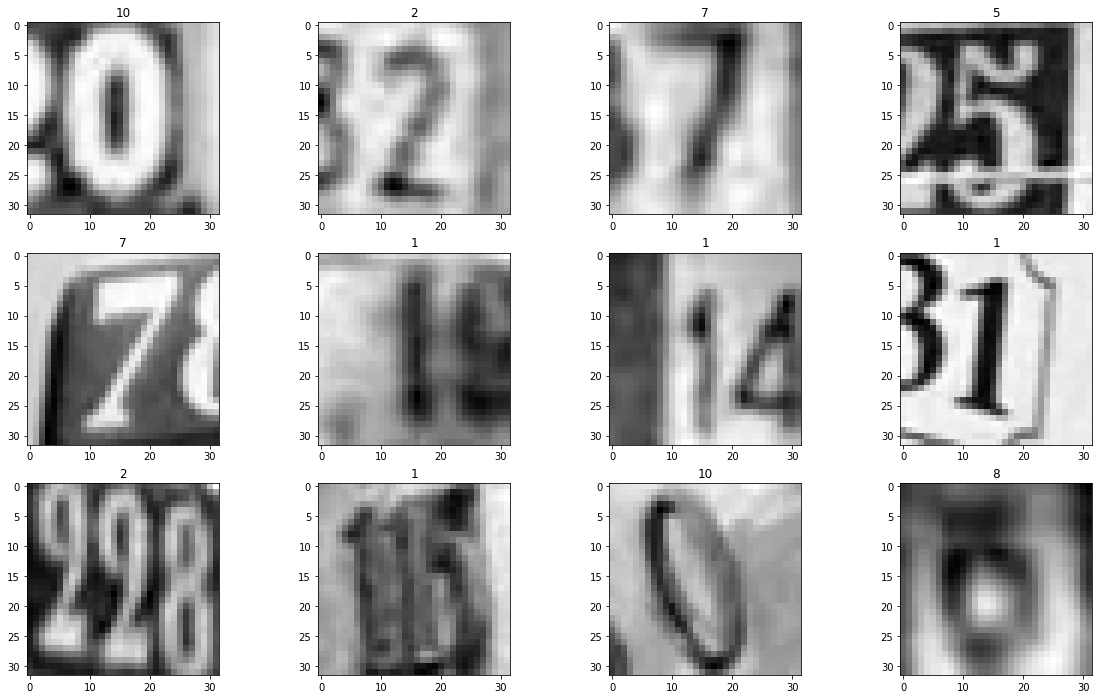

In [11]:
fig = plt.figure(figsize=(20, 12))

i = 0
for ind in random_list:
    i = i + 1
    plt.subplot(3,4,i)
    plt.title(train_labels[ind][0])
    plt.imshow(train_data_gray[ind,:,:], cmap=plt.get_cmap("gray"))

In [12]:
# Look at the train labels
np.unique(train_labels)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [13]:
# Encode the labels so that we can use Categorical Crossentropy loss
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(train_labels)
enc.fit(test_labels)
train_labels_use = enc.transform(train_labels).toarray()
test_labels_use = enc.transform(test_labels).toarray()

In [14]:
# Define the cnn model
input_shape=(train_data_use.shape[1],train_data_use.shape[2],train_data_use.shape[3])

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 32)          1

In [15]:
# Compile the model
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])

mc = tf.keras.callbacks.ModelCheckpoint(filepath='svhn_best_model.h5', monitor='accuracy', 
                                        verbose=0, save_weights_only=True, save_best_only=True, mode='max')
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, mode='max', verbose=0)

In [16]:
# Train the model
num_epochs=20
cnn_history = cnn_model.fit(train_data_use, train_labels_use, epochs=num_epochs, 
                            validation_split=0.4, callbacks=[mc,es])

Epoch 1/20
1374/1374 [==============================] - 49s 36ms/step - loss: 1.6794 - accuracy: 0.4521 - val_loss: 0.8663 - val_accuracy: 0.7320
Epoch 2/20
1374/1374 [==============================] - 51s 37ms/step - loss: 0.8487 - accuracy: 0.7343 - val_loss: 0.6258 - val_accuracy: 0.8088
Epoch 3/20
1374/1374 [==============================] - 49s 36ms/step - loss: 0.6606 - accuracy: 0.7959 - val_loss: 0.5207 - val_accuracy: 0.8474
Epoch 4/20
1374/1374 [==============================] - 50s 37ms/step - loss: 0.5782 - accuracy: 0.8239 - val_loss: 0.4735 - val_accuracy: 0.8609
Epoch 5/20
1374/1374 [==============================] - 51s 37ms/step - loss: 0.5232 - accuracy: 0.8406 - val_loss: 0.4565 - val_accuracy: 0.8664
Epoch 6/20
1374/1374 [==============================] - 51s 37ms/step - loss: 0.4831 - accuracy: 0.8549 - val_loss: 0.4418 - val_accuracy: 0.8713
Epoch 7/20
1374/1374 [==============================] - 52s 38ms/step - loss: 0.4511 - accuracy: 0.8637 - val_loss: 0.4085 -

In [17]:
# Evaluate the model on the test set
test_loss_cnn, test_acc_cnn = cnn_model.evaluate(test_data_use, test_labels_use, verbose=2)

814/814 - 4s - loss: 0.3785 - accuracy: 0.8924


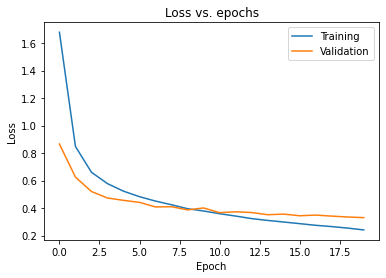

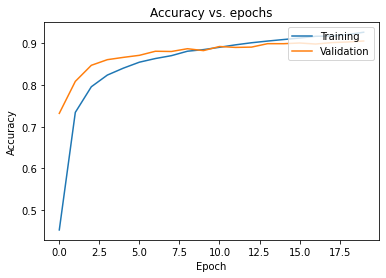

In [18]:
# Plot the loss vs epoch and accuracy vs epoch of train and validation data sets
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [19]:
# Display the test set accuracy and loss
print('accuracy of test : {acc:0.3f}'.format(acc=test_acc_cnn))
print('loss of test : {acc:0.3f}'.format(acc=test_loss_cnn))

accuracy of test : 0.892
loss of test : 0.379


In [20]:
!ls -lh svhn_best_model.h5

-rw-r--r--  1 natarajagodina  staff   1.2M 17 Nov 20:12 svhn_best_model.h5


In [21]:
# Load the best weights for CNN model
cnn_model.load_weights('svhn_best_model.h5')

[3147, 4427, 3932, 16474]


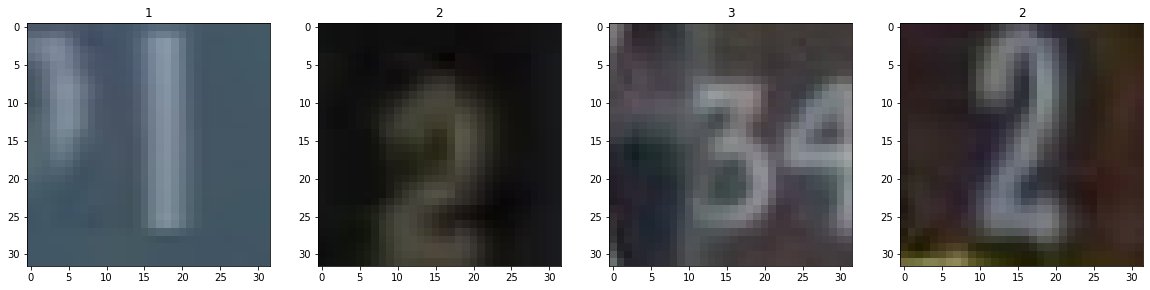

In [40]:
# Randomly select 4 images and corresponding labels from the test set and display the images with their labels.
import random
import matplotlib.pyplot as plt

# Generating 4 random numbers to get random sample of images and corresponding labels
random_list = random.sample(range(0,test_data.shape[0]),4)
print(random_list)

fig = plt.figure(figsize=(20, 12))

i = 0
for ind in random_list:
    i = i + 1
    plt.subplot(1,4,i)
    plt.title(test_labels[ind][0])
    plt.imshow(test_data[ind,:,:,:])

In [41]:
test_preds = cnn_model.predict(test_data_use)

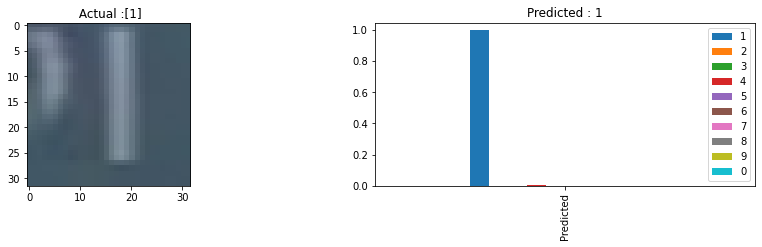

<Figure size 432x288 with 0 Axes>

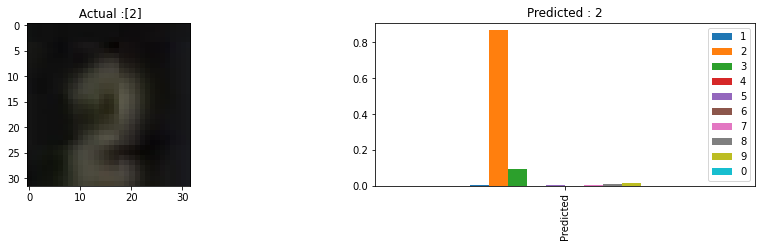

<Figure size 432x288 with 0 Axes>

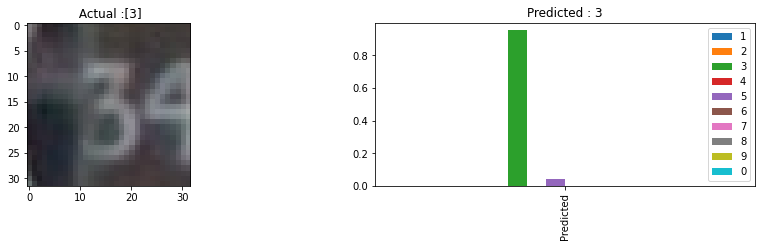

<Figure size 432x288 with 0 Axes>

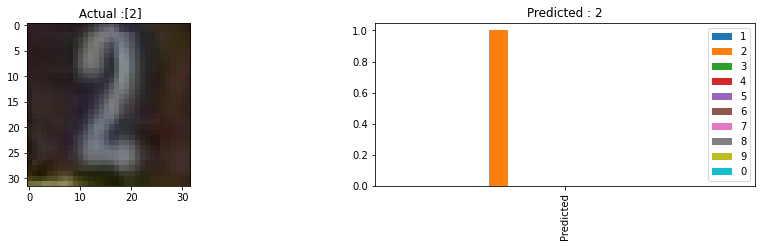

<Figure size 432x288 with 0 Axes>

In [47]:
i = 0
for ind in random_list:
    i = i + 1
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,3))
    fig = plt.figure()
    
    ax1.imshow(test_data[ind,:,:])
    ax1.set_title(' Actual :' + str(test_labels[ind]))
    
    value = test_preds[ind].argmax() +1
    title = 'Predicted : ' + str(value) 
    ax2.set_title(title)
    data = {"1":test_preds[ind][0],"2":test_preds[ind][1],"3":test_preds[ind][2],"4":test_preds[ind][3],
            "5":test_preds[ind][4],"6":test_preds[ind][5], "7":test_preds[ind][6],"8":test_preds[ind][7],
            "9":test_preds[ind][8],"0":test_preds[ind][9]}
    df = pd.DataFrame(data=data,index=index)
    df.plot.bar(ax=ax2)